# Assignment Decision Tree(fraud)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
fraud = pd.read_csv("E:DATA SETS/Fraud_check.csv")

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud1 = fraud

In [6]:
rename = {'Marital.Status' : 'marital_status',
         'Taxable.Income' : 'taxable_income',
         'City.Population' : 'city_population',
         'Work.Experience' : 'work_experience'}
fraud1.rename(columns=rename, inplace= True )

In [7]:
fraud1["tax_status"] = np.where(fraud1['taxable_income']<=30000,'Risky','Good') 

In [8]:
fraud1

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,tax_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
from sklearn import preprocessing

In [10]:
label_encoder = preprocessing.LabelEncoder()
fraud1['Undergrad']= label_encoder.fit_transform(fraud1['Undergrad']) 
fraud1['marital_status']= label_encoder.fit_transform(fraud1['marital_status']) 
fraud1['Urban']= label_encoder.fit_transform(fraud1['Urban'])

In [11]:
fraud1

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,tax_status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [12]:
fraud1.drop(['taxable_income'], axis=1, inplace= True)
fraud1

,Undergrad,marital_status,city_population,work_experience,Urban,tax_status
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [13]:
X=fraud1.iloc[:,:5]
X

,Undergrad,marital_status,city_population,work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [14]:
fraud1.tax_status.value_counts()

Good     476
Risky    124
Name: tax_status, dtype: int64

In [15]:
Y=fraud1.iloc[:,5]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_status, Length: 600, dtype: object

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=40,test_size=0.2)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(480, 5)
(120, 5)
(480,)
(120,)


In [18]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

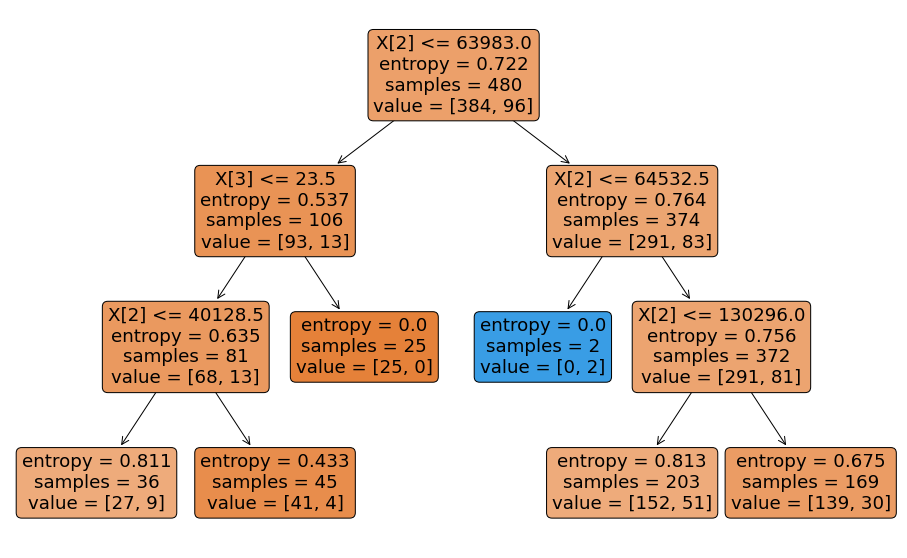

In [20]:
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model,rounded = True,filled = True)
# Display the tree plot figure.
plt.show()

In [21]:
preds = model.predict(X_test)  
pd.Series(preds).value_counts()

Good    120
dtype: int64

In [22]:
pd.crosstab(Y_test,preds)

col_0,Good
tax_status,
Good,92
Risky,28


In [23]:
np.mean(preds==Y_test)

0.7666666666666667

In [24]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

        Good       1.00      0.77      0.87       120
       Risky       0.00      0.00      0.00         0

    accuracy                           0.77       120
   macro avg       0.50      0.38      0.43       120
weighted avg       1.00      0.77      0.87       120



C:\Users\Win-10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Win-10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Win-10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
pred=model.predict(X_test)
np.mean(preds==Y_test)

0.7666666666666667

# Assignment Decision Tree (Company Dataset)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [28]:
data = pd.read_csv("E:DATA SETS/Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [30]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [31]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [32]:
data["Sales"] = np.where(data['Sales']>8,'yes','no') 

In [33]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,yes,138,73,11,276,120,Bad,42,17,Yes,Yes
1,yes,111,48,16,260,83,Good,65,10,Yes,Yes
2,yes,113,35,10,269,80,Medium,59,12,Yes,Yes
3,no,117,100,4,466,97,Medium,55,14,Yes,Yes
4,no,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,Good,33,14,Yes,Yes
396,no,139,23,3,37,120,Medium,55,11,No,Yes
397,no,162,26,12,368,159,Medium,40,18,Yes,Yes
398,no,100,79,7,284,95,Bad,50,12,Yes,Yes


In [34]:
data1=pd.get_dummies(data,columns=['ShelveLoc'])
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,yes,138,73,11,276,120,42,17,Yes,Yes,1,0,0
1,yes,111,48,16,260,83,65,10,Yes,Yes,0,1,0
2,yes,113,35,10,269,80,59,12,Yes,Yes,0,0,1
3,no,117,100,4,466,97,55,14,Yes,Yes,0,0,1
4,no,141,64,3,340,128,38,13,Yes,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,33,14,Yes,Yes,0,1,0
396,no,139,23,3,37,120,55,11,No,Yes,0,0,1
397,no,162,26,12,368,159,40,18,Yes,Yes,0,0,1
398,no,100,79,7,284,95,50,12,Yes,Yes,1,0,0


In [35]:
data1.Sales.replace(('yes','no'),(1, 0),inplace=True)
data1.Urban.replace(('Yes','No'),(1, 0),inplace=True)
data1.US.replace(('Yes','No'),(1, 0),inplace=True)
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,138,73,11,276,120,42,17,1,1,1,0,0
1,1,111,48,16,260,83,65,10,1,1,0,1,0
2,1,113,35,10,269,80,59,12,1,1,0,0,1
3,0,117,100,4,466,97,55,14,1,1,0,0,1
4,0,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,33,14,1,1,0,1,0
396,0,139,23,3,37,120,55,11,0,1,0,0,1
397,0,162,26,12,368,159,40,18,1,1,0,0,1
398,0,100,79,7,284,95,50,12,1,1,1,0,0


In [36]:
X=pd.concat([data1.iloc[:,1:]])
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,1,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0
2,113,35,10,269,80,59,12,1,1,0,0,1
3,117,100,4,466,97,55,14,1,1,0,0,1
4,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,0,1,0
396,139,23,3,37,120,55,11,0,1,0,0,1
397,162,26,12,368,159,40,18,1,1,0,0,1
398,100,79,7,284,95,50,12,1,1,1,0,0


In [37]:
Y=data1.iloc[:,0]
Y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=246,test_size=0.2)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 12)
(80, 12)
(320,)
(80,)


In [40]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [41]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

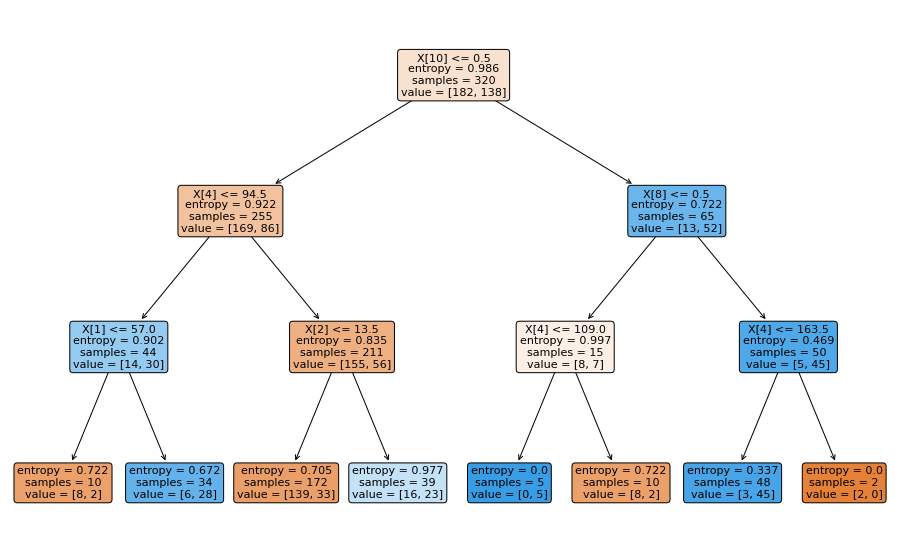

In [42]:
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model,rounded = True,filled = True)
# Display the tree plot figure.
plt.show()

In [43]:
preds = model.predict(X_test) 
pd.Series(preds).value_counts()

0    52
1    28
dtype: int64

In [44]:
pd.crosstab(Y_test,preds)

col_0,0,1
Sales,,
0,44,10
1,8,18


In [45]:
np.mean(preds==Y_test)

0.775

In [46]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.69      0.64      0.67        28

    accuracy                           0.78        80
   macro avg       0.75      0.74      0.75        80
weighted avg       0.77      0.78      0.77        80



In [47]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [48]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
pred=model.predict(X_test)
np.mean(preds==Y_test)

0.775

# The End